In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'Advertising_DataSet_ISL.csv', 'Advertising_Sales_Revenue_Analysis.ipynb', 'Crime Analysis.ipynb', 'Crimes.csv', 'Crime_Analysis.ipynb', 'Pactera EDGE Hackathon Questions_v2.docx']


In [3]:
crime_dataset=pd.read_csv("Crimes.csv")

In [4]:
crime_dataset.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area
0,11798117,JC397040,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15
1,11798223,JC397365,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44
2,11797883,JC396936,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63
3,11797909,JC397003,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46
4,11797926,JC396947,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46


In [5]:
crime_dataset.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
dtype: object

In [6]:
crime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161942 entries, 0 to 161941
Data columns (total 14 columns):
ID                      161942 non-null int64
Case Number             161942 non-null object
Date                    161942 non-null object
Block                   161942 non-null object
IUCR                    161942 non-null object
Primary Type            161942 non-null object
Description             161942 non-null object
Location Description    161373 non-null object
Arrest                  161942 non-null bool
Domestic                161942 non-null bool
Beat                    161942 non-null int64
District                161942 non-null int64
Ward                    161935 non-null float64
Community Area          161942 non-null int64
dtypes: bool(2), float64(1), int64(4), object(7)
memory usage: 15.1+ MB


In [7]:
crime_dataset.shape

(161942, 14)

In [8]:
crime_dataset.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    569
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      7
Community Area            0
dtype: int64

In [9]:
crime_dataset=crime_dataset.dropna()

In [10]:
crime_dataset.shape

(161366, 14)

In [11]:
crime_dataset=crime_dataset.drop(['ID'],axis=1)
crime_dataset=crime_dataset.drop(['Case Number'],axis=1)

In [12]:
crime_dataset.shape

(161366, 12)

In [14]:
crime_dataset['date1']=pd.to_datetime(crime_dataset['Date'])

In [15]:
crime_dataset['Year']=crime_dataset['date1'].dt.year

In [16]:
crime_dataset['Month']=crime_dataset['date1'].dt.month

In [17]:
crime_dataset['Day']=crime_dataset['date1'].dt.day

In [18]:
crime_dataset['Hour']=crime_dataset['date1'].dt.hour

In [22]:
crime_dataset['Block1']=crime_dataset['Block'].apply(lambda x: x.split()[0])

In [23]:
crime_dataset.head(5)

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,date1,Year,Month,Day,Hour,Block1
0,8/17/19 23:59,058XX W EDDY ST,820,THEFT,$500 AND UNDER,STREET,True,False,1633,16,36.0,15,2019-08-17 23:59:00,2019,8,17,23,058XX
1,8/17/19 23:59,007XX E 87TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,TAVERN/LIQUOR STORE,False,False,632,6,6.0,44,2019-08-17 23:59:00,2019,8,17,23,007XX
2,8/17/19 23:57,022XX W 50TH PL,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,False,931,9,15.0,63,2019-08-17 23:57:00,2019,8,17,23,022XX
3,8/17/19 23:55,086XX S PHILLIPS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,False,False,423,4,7.0,46,2019-08-17 23:55:00,2019,8,17,23,086XX
4,8/17/19 23:45,079XX S SOUTH CHICAGO AVE,460,BATTERY,SIMPLE,SIDEWALK,True,False,411,4,8.0,46,2019-08-17 23:45:00,2019,8,17,23,079XX


In [20]:
print(crime_dataset['Primary Type'].unique())

['THEFT' 'CRIMINAL DAMAGE' 'WEAPONS VIOLATION' 'BATTERY' 'ASSAULT'
 'NARCOTICS' 'ROBBERY' 'MOTOR VEHICLE THEFT' 'OTHER OFFENSE' 'SEX OFFENSE'
 'BURGLARY' 'CRIM SEXUAL ASSAULT' 'GAMBLING' 'OFFENSE INVOLVING CHILDREN'
 'INTERFERENCE WITH PUBLIC OFFICER' 'CRIMINAL TRESPASS' 'ARSON'
 'DECEPTIVE PRACTICE' 'PUBLIC PEACE VIOLATION'
 'CONCEALED CARRY LICENSE VIOLATION' 'LIQUOR LAW VIOLATION' 'HOMICIDE'
 'STALKING' 'OBSCENITY' 'PROSTITUTION' 'KIDNAPPING' 'INTIMIDATION'
 'HUMAN TRAFFICKING' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'NON-CRIMINAL']


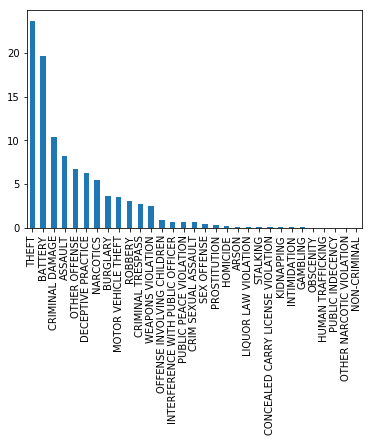

In [21]:
((crime_dataset['Primary Type'].value_counts() / len(crime_dataset)) * 100).plot.bar()

In [24]:
crime_dataset['Block1'].unique()

array(['058XX', '007XX', '022XX', '086XX', '079XX', '023XX', '061XX',
       '011XX', '014XX', '044XX', '039XX', '037XX', '020XX', '028XX',
       '006XX', '038XX', '009XX', '012XX', '059XX', '081XX', '117XX',
       '060XX', '001XX', '068XX', '048XX', '065XX', '0000X', '072XX',
       '024XX', '090XX', '054XX', '091XX', '018XX', '021XX', '003XX',
       '041XX', '032XX', '040XX', '004XX', '052XX', '035XX', '050XX',
       '075XX', '077XX', '045XX', '017XX', '002XX', '026XX', '051XX',
       '100XX', '013XX', '019XX', '067XX', '029XX', '055XX', '056XX',
       '070XX', '069XX', '089XX', '076XX', '027XX', '033XX', '097XX',
       '010XX', '008XX', '062XX', '087XX', '025XX', '073XX', '034XX',
       '046XX', '015XX', '053XX', '049XX', '085XX', '123XX', '103XX',
       '047XX', '057XX', '064XX', '005XX', '124XX', '066XX', '083XX',
       '113XX', '036XX', '114XX', '084XX', '110XX', '078XX', '043XX',
       '030XX', '042XX', '115XX', '099XX', '112XX', '107XX', '071XX',
       '109XX', '016

In [25]:
((crime_dataset['Block1'].value_counts() / len(crime_dataset)) * 100)

0000X    3.889295
001XX    2.924408
002XX    2.331346
003XX    2.033886
008XX    1.824424
           ...   
134XX    0.016112
135XX    0.011774
000XX    0.007437
136XX    0.004338
137XX    0.004338
Name: Block1, Length: 139, dtype: float64

In [26]:
((crime_dataset['Location Description'].value_counts() / len(crime_dataset)) * 100)

STREET               22.232069
RESIDENCE            16.314465
APARTMENT            13.461944
SIDEWALK              7.829406
OTHER                 3.997744
                       ...    
CHA GROUNDS           0.000620
RAILROAD PROPERTY     0.000620
GANGWAY               0.000620
VACANT LOT            0.000620
GARAGE                0.000620
Name: Location Description, Length: 122, dtype: float64

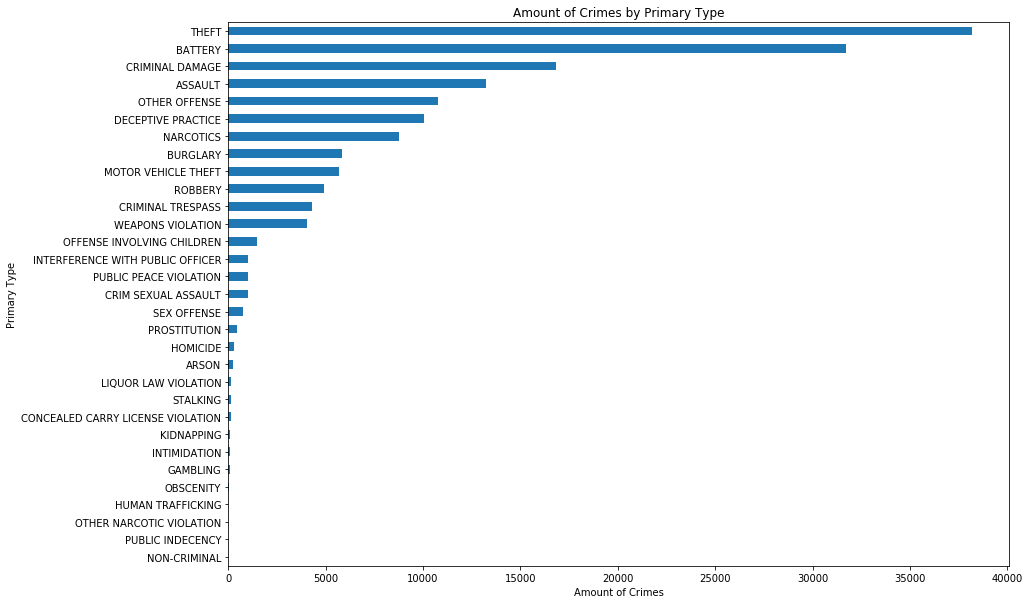

In [27]:
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

crime_dataset.groupby([crime_dataset['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

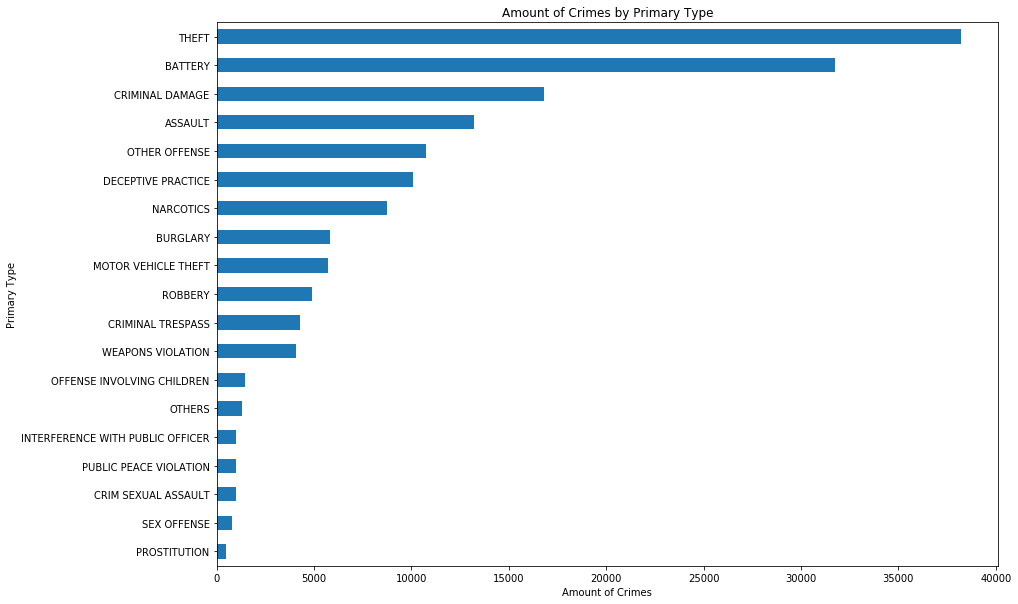

In [28]:
all_classes = crime_dataset.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])
unwanted_classes = all_classes.tail(13)

crime_dataset.loc[crime_dataset['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

crime_dataset.groupby([crime_dataset['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [29]:
final_dataset=crime_dataset[['Primary Type', 'Location Description', 'Arrest', 'Domestic', 'Year', 'Month', 'Day', 'Hour',  'Block1']]

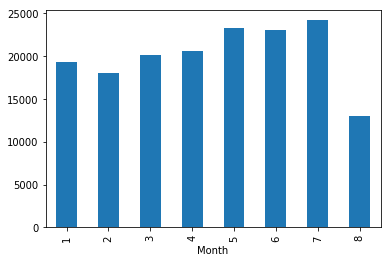

In [30]:
final_dataset.groupby([final_dataset.Month]).size().plot.bar()

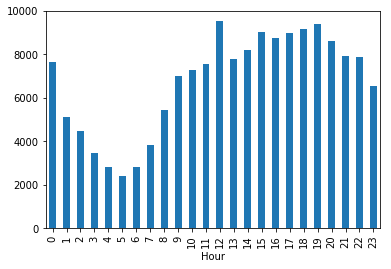

In [31]:
final_dataset.groupby([final_dataset.Hour]).size().plot.bar()

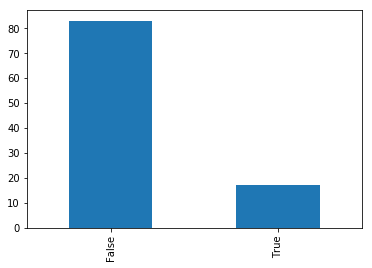

In [32]:
((final_dataset['Domestic'].value_counts() / len(final_dataset)) * 100).plot.bar()

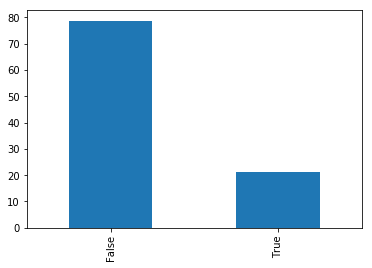

In [33]:
((final_dataset['Arrest'].value_counts() / len(final_dataset)) * 100).plot.bar()

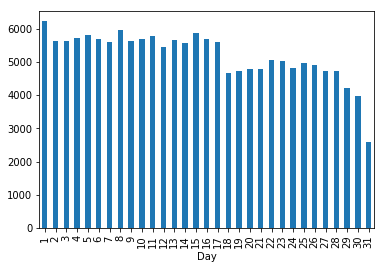

In [34]:
final_dataset.groupby([final_dataset.Day]).size().plot.bar()

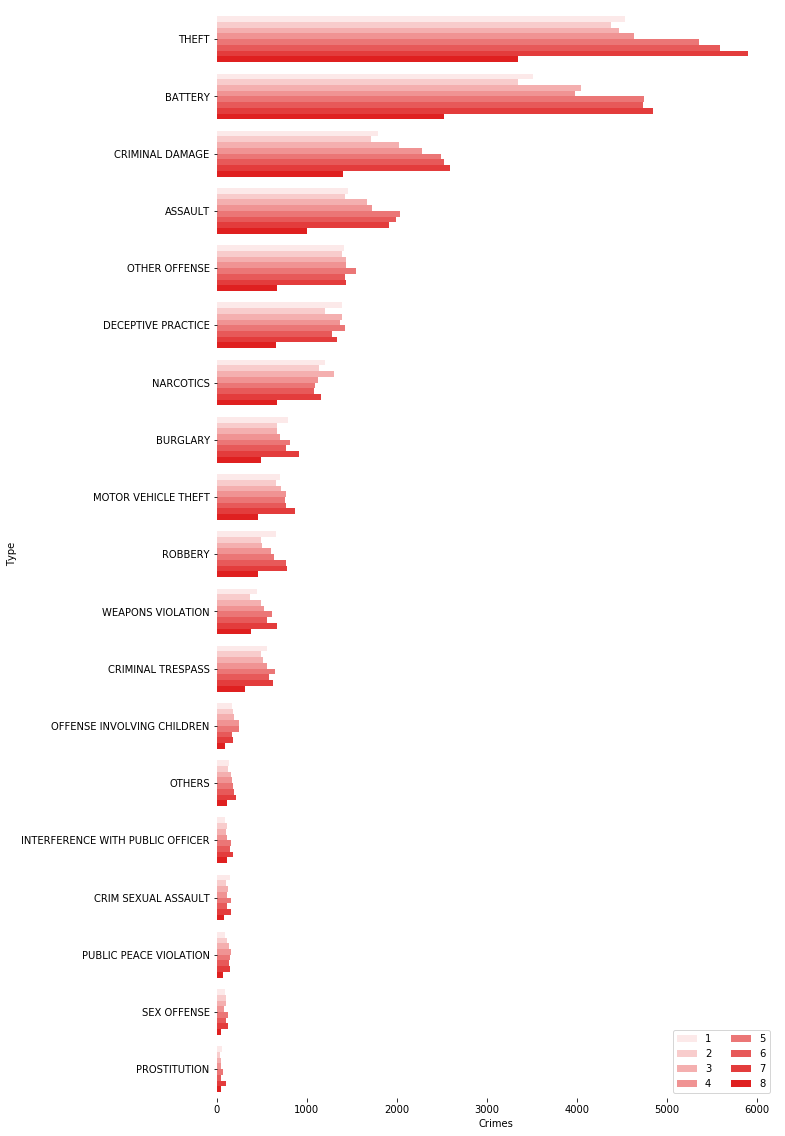

In [35]:
crime_count1 = pd.DataFrame(final_dataset.groupby(['Primary Type','Month']).size().sort_values(ascending=False).rename('counts').reset_index())
f, ax = plt.subplots(figsize=(10,20))
sns.set_color_codes("pastel")
sns.barplot( y="Primary Type",x="counts" , data=crime_count1, hue='Month', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

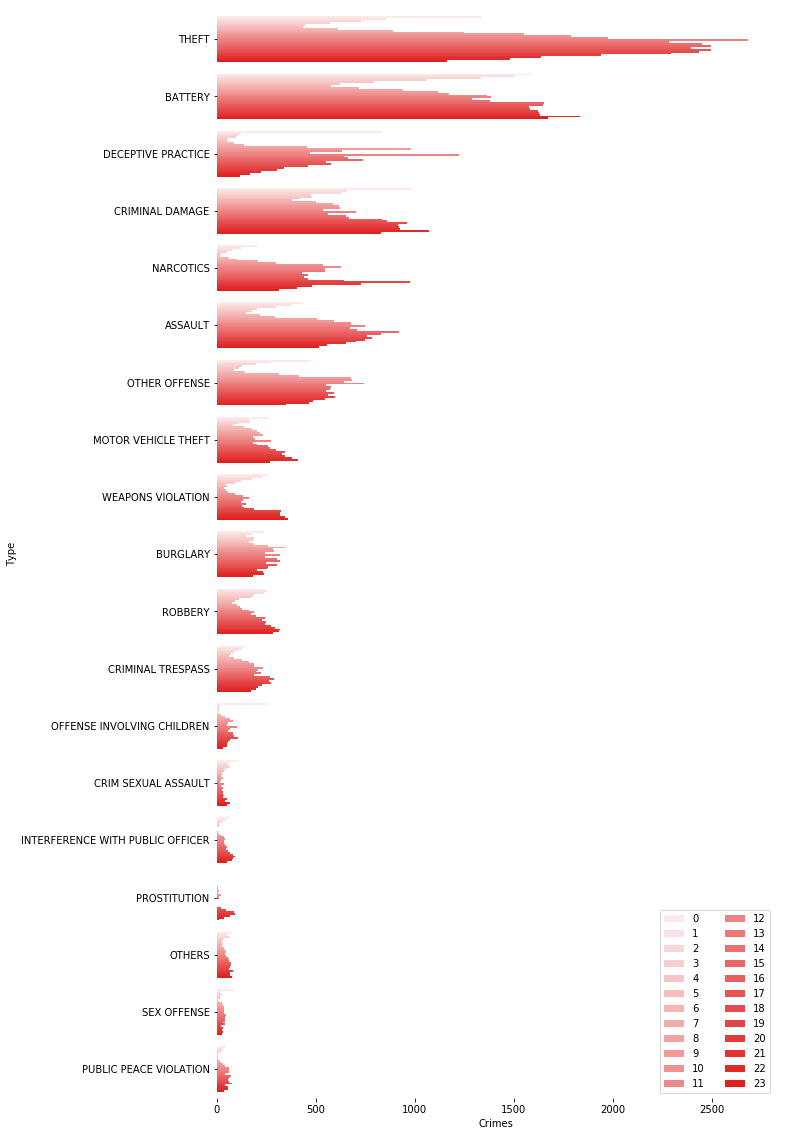

In [36]:
crime_count2 = pd.DataFrame(final_dataset.groupby(['Primary Type','Hour']).size().sort_values(ascending=False).rename('counts').reset_index())
f, ax = plt.subplots(figsize=(10,20))
sns.set_color_codes("pastel")
sns.barplot( y="Primary Type",x="counts" , data=crime_count2, hue='Hour', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

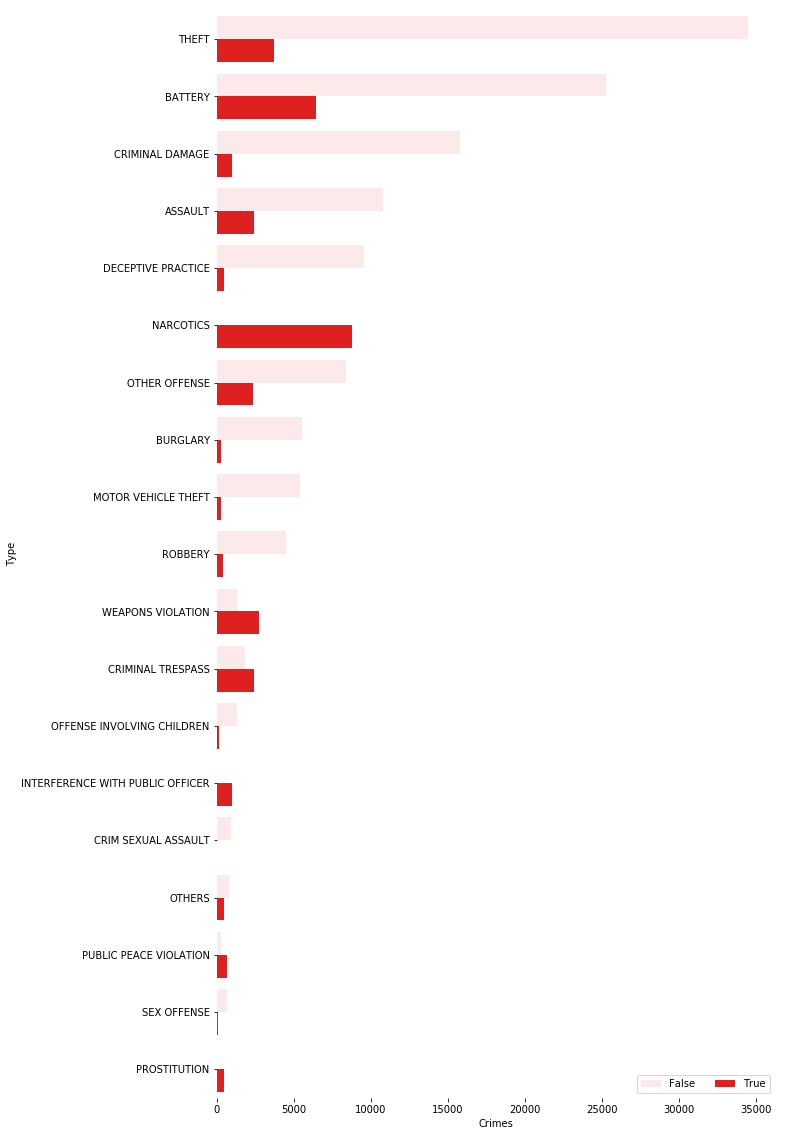

In [37]:
crime_count3 = pd.DataFrame(final_dataset.groupby(['Primary Type','Arrest']).size().sort_values(ascending=False).rename('counts').reset_index())
f, ax = plt.subplots(figsize=(10,20))
sns.set_color_codes("pastel")
sns.barplot( y="Primary Type",x="counts" , data=crime_count3, hue='Arrest', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

In [38]:
x_dataset=pd.get_dummies(final_dataset['Block1'], prefix='Block1')
y_dataset=final_dataset['Primary Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.25434827514976244

In [39]:
# Prediction With Column Primary Type and Block1:

x_dataset=pd.get_dummies(final_dataset['Primary Type'], prefix='Primary Type')
y_dataset=final_dataset['Block1']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.04030159058045858